# Лабораторна робота №6  

In [2]:
N = ord("M") % 10 + 1
print("Варіант -",N)

Варіант - 8


## Система рівнянь для варіанта №8

$$
\begin{cases}
13.1 x_1 + 9.2 x_2 = 173 \\
8.3 x_1 + 21 x_2 = 271 \\
3.2 x_1 - 8.3 x_2 = 34
\end{cases}
$$


In [3]:

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

a1, b1, c1 = 13.1,  9.2, 173   
a2, b2, c2 =  8.3, 21.0, 271   
a3, b3, c3 =  3.2, -8.3,  34 

def line1(x1_values: np.ndarray) -> np.ndarray:
    return (c1 - a1 * x1_values) / b1

def line2(x1_values: np.ndarray) -> np.ndarray:
    return (c2 - a2 * x1_values) / b2

def line3(x1_values: np.ndarray) -> np.ndarray:
    return (c3 - a3 * x1_values) / b3

x1_values = np.linspace(0, 25, 400)

x2_line1 = line1(x1_values)
x2_line2 = line2(x1_values)
x2_line3 = line3(x1_values)

color1, style1 = "crimson", "--"
color2, style2 = "darkgreen", "-."
color3, style3 = "goldenrod", ":"


## Три Окремі графіки для кожної прямої


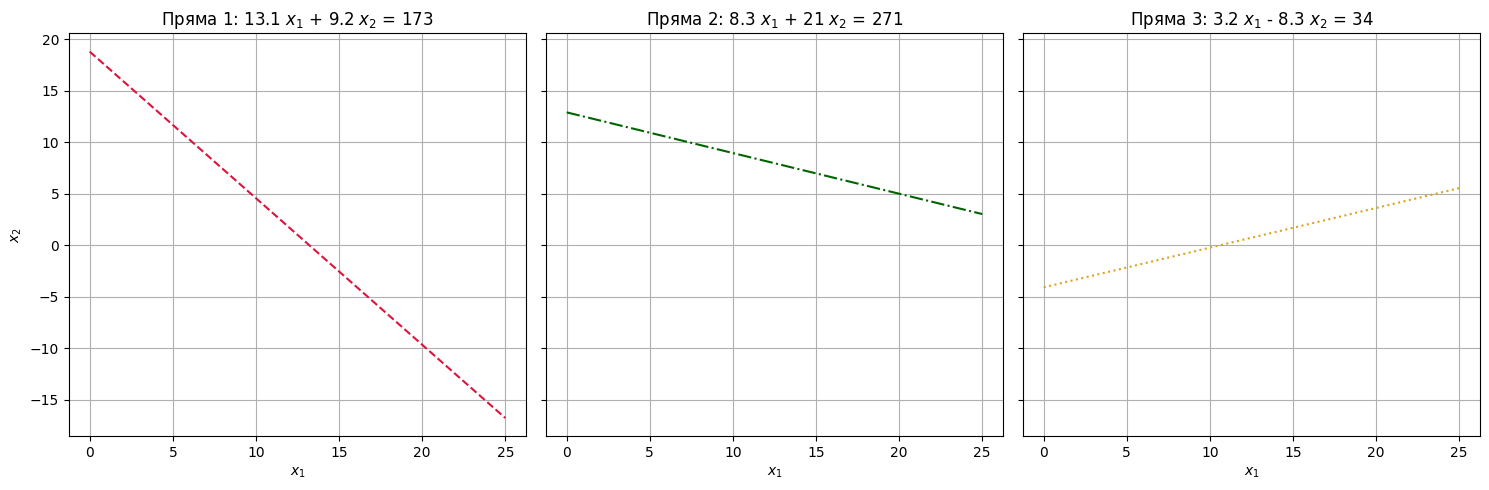

In [4]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axes[0].plot(x1_values, x2_line1, linestyle=style1, color=color1)
axes[0].set_title(r"Пряма 1: 13.1 $x_1$ + 9.2 $x_2$ = 173")
axes[0].set_xlabel(r"$x_1$")
axes[0].set_ylabel(r"$x_2$")
axes[0].grid(True)

axes[1].plot(x1_values, x2_line2, linestyle=style2, color=color2)
axes[1].set_title(r"Пряма 2: 8.3 $x_1$ + 21 $x_2$ = 271")
axes[1].set_xlabel(r"$x_1$")
axes[1].grid(True)

axes[2].plot(x1_values, x2_line3, linestyle=style3, color=color3)
axes[2].set_title(r"Пряма 3: 3.2 $x_1$ - 8.3 $x_2$ = 34")
axes[2].set_xlabel(r"$x_1$")
axes[2].grid(True)

plt.tight_layout()
plt.show()

fig.savefig("separate_lines.png", dpi=150)


## Три прямі на одному рисунку


In [5]:

A12 = np.array([[a1, b1],
                [a2, b2]])

b12 = np.array([c1, c2])
x1_12, x2_12 = np.linalg.solve(A12, b12)

A13 = np.array([[a1, b1],
                [a3, b3]])

b13 = np.array([c1, c3])
x1_13, x2_13 = np.linalg.solve(A13, b13)

A23 = np.array([[a2, b2],
                [a3, b3]])
b23 = np.array([c2, c3])
x1_23, x2_23 = np.linalg.solve(A23, b23)

print(f"Точка перетину прямої 1 і 2: {x1_12:.3f}, {x2_12:.3f}")
print(f"Точка перетину прямої 1 і 3: {x1_13:.3f}, {x2_13:.3f}")
print(f"Точка перетину прямої 2 і 3: {x1_23:.3f}, {x2_23:.3f}")

triangle_x1 = np.array([x1_12, x1_13, x1_23])
triangle_x2 = np.array([x2_12, x2_13, x2_23])


Точка перетину прямої 1 і 2: 5.735, 10.638
Точка перетину прямої 1 і 3: 12.656, 0.783
Точка перетину прямої 2 і 3: 21.775, 4.299


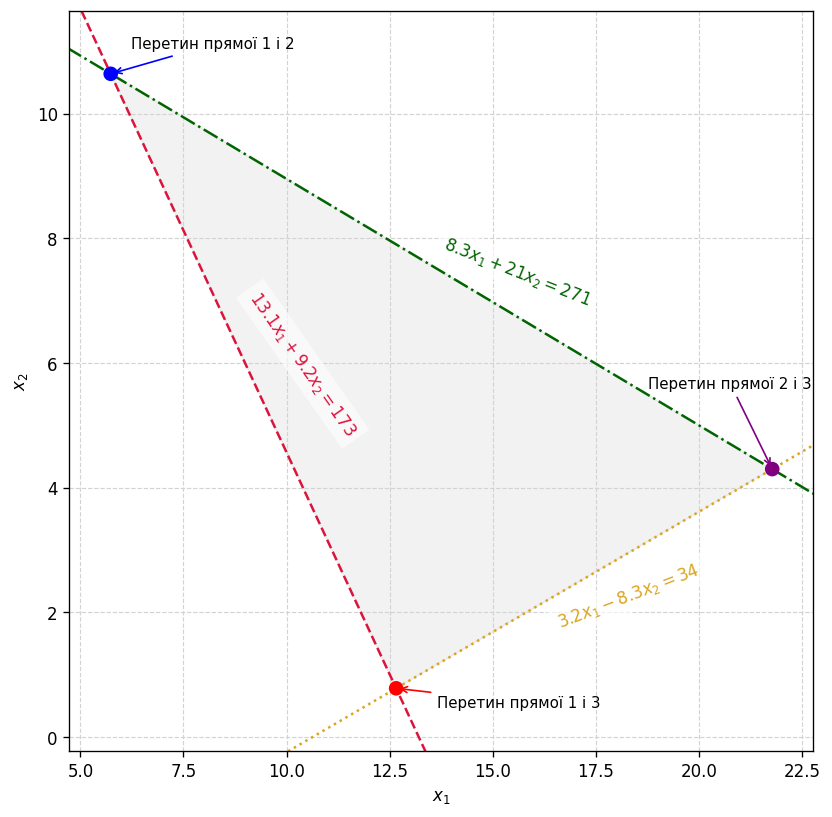

In [6]:
slope1 = -a1 / b1
slope2 = -a2 / b2
slope3 = -a3 / b3

angle1 = np.degrees(np.arctan(slope1))
angle2 = np.degrees(np.arctan(slope2))
angle3 = np.degrees(np.arctan(slope3))

fig, ax = plt.subplots(figsize=(8, 8), dpi=120)

ax.plot(x1_values, x2_line1, linestyle=style1, color=color1)
ax.plot(x1_values, x2_line2, linestyle=style2, color=color2)
ax.plot(x1_values, x2_line3, linestyle=style3, color=color3)

x_pad = 1.0
y_pad = 1.0
min_x1 = min(triangle_x1) - x_pad
max_x1 = max(triangle_x1) + x_pad
min_x2 = min(triangle_x2) - y_pad
max_x2 = max(triangle_x2) + y_pad

ax.set_xlim(min_x1, max_x1)
ax.set_ylim(min_x2, max_x2)

ax.grid(True, linestyle="--", linewidth=0.7, color="lightgray")

ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")

label_x1_1 = 9                     
label_x2_1 = line1(label_x1_1)   
ax.text(label_x1_1, label_x2_1, r"$13.1 x_1 + 9.2 x_2 = 173$", fontsize=10, color=color1, rotation=angle1, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

label_x1_2 = (x1_12 + x1_23) / 2
label_x2_2 = line2(label_x1_2)
ax.text(label_x1_2, label_x2_2, r"$8.3 x_1 + 21 x_2 = 271$", fontsize=10, color=color2, rotation=angle2, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

label_x1_3 = 16.5 
label_x2_3 = line3(label_x1_3)  
ax.text(label_x1_3, label_x2_3, r"$3.2 x_1 - 8.3 x_2 = 34$", fontsize=10, color=color3, rotation=angle3, va="center", ha="left", 
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

ax.scatter([x1_12, x1_13, x1_23], [x2_12, x2_13, x2_23], color=["blue", "red", "purple"], s=60, zorder=5)

ax.annotate("Перетин прямої 1 і 2", xy=(x1_12, x2_12), xytext=(x1_12 + 0.5, x2_12 + 0.4), fontsize=9, arrowprops=dict(arrowstyle="->", color="blue"))

ax.annotate("Перетин прямої 1 і 3", xy=(x1_13, x2_13), xytext=(x1_13 + 1, x2_13 - 0.3), fontsize=9, arrowprops=dict(arrowstyle="->", color="red"))

ax.annotate("Перетин прямої 2 і 3", xy=(x1_23, x2_23), xytext=(x1_23 - 3, x2_23 + 1.3), fontsize=9, arrowprops=dict(arrowstyle="->", color="purple"))

ax.fill(triangle_x1, triangle_x2,color="gray", alpha=0.1)

plt.show()

fig.savefig("all_lines.png", dpi=150)
